# 접종 완료한(fully vaccinated) 사람의 비율

## 모듈 불러오기

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## 데이터 불러오기

In [105]:
data = pd.read_csv("./country_vaccinations.csv")
vaccination = data
print(vaccination.shape)
vaccination.head()

(86512, 15)


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


## 데이터 전처리

- 결측값 제거
- "country" 기준으로 중복값 제거(최신 데이터만 남김)

In [106]:
vaccination = vaccination.fillna(0)
vaccination = vaccination.drop_duplicates("country", keep="last")

In [107]:
vaccination = vaccination.sort_values(by="people_fully_vaccinated_per_hundred")
vaccination.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
49886,Mauritius,MUS,2022-03-24,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,"Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing",World Health Organization,https://africacdc.org/covid-19-vaccination/
46420,Luxembourg,LUX,2022-03-26,1.280144e+06,480279.0,0.0,300.0,254.0,201.66,75.66,0.0,400.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Government of Luxembourg,https://data.public.lu/en/datasets/donnees-cov...
16225,China,CHN,2022-03-29,3.263129e+09,0.0,0.0,4087000.0,4075429.0,225.94,0.00,0.0,2822.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",National Health Commission,http://www.nhc.gov.cn/jkj/s7915/202203/d81d339...
63652,Qatar,QAT,2022-03-29,6.607185e+06,0.0,0.0,4126.0,7901.0,225.46,0.00,0.0,2696.0,"Moderna, Pfizer/BioNTech",Ministry of Public Health,https://covid19.moph.gov.qa/EN/Pages/Vaccinati...
67262,Sao Tome and Principe,STP,2022-03-24,0.000000e+00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Oxford/AstraZeneca,World Health Organization,https://africacdc.org/covid-19-vaccination/


## 데이터 정제

### 세계 백신 접종 현황
1. 모든 국가의 백신 접종 현황 그래프
2. 접종률이 50% 이상인 국가의 백신 접종 현황 그래프

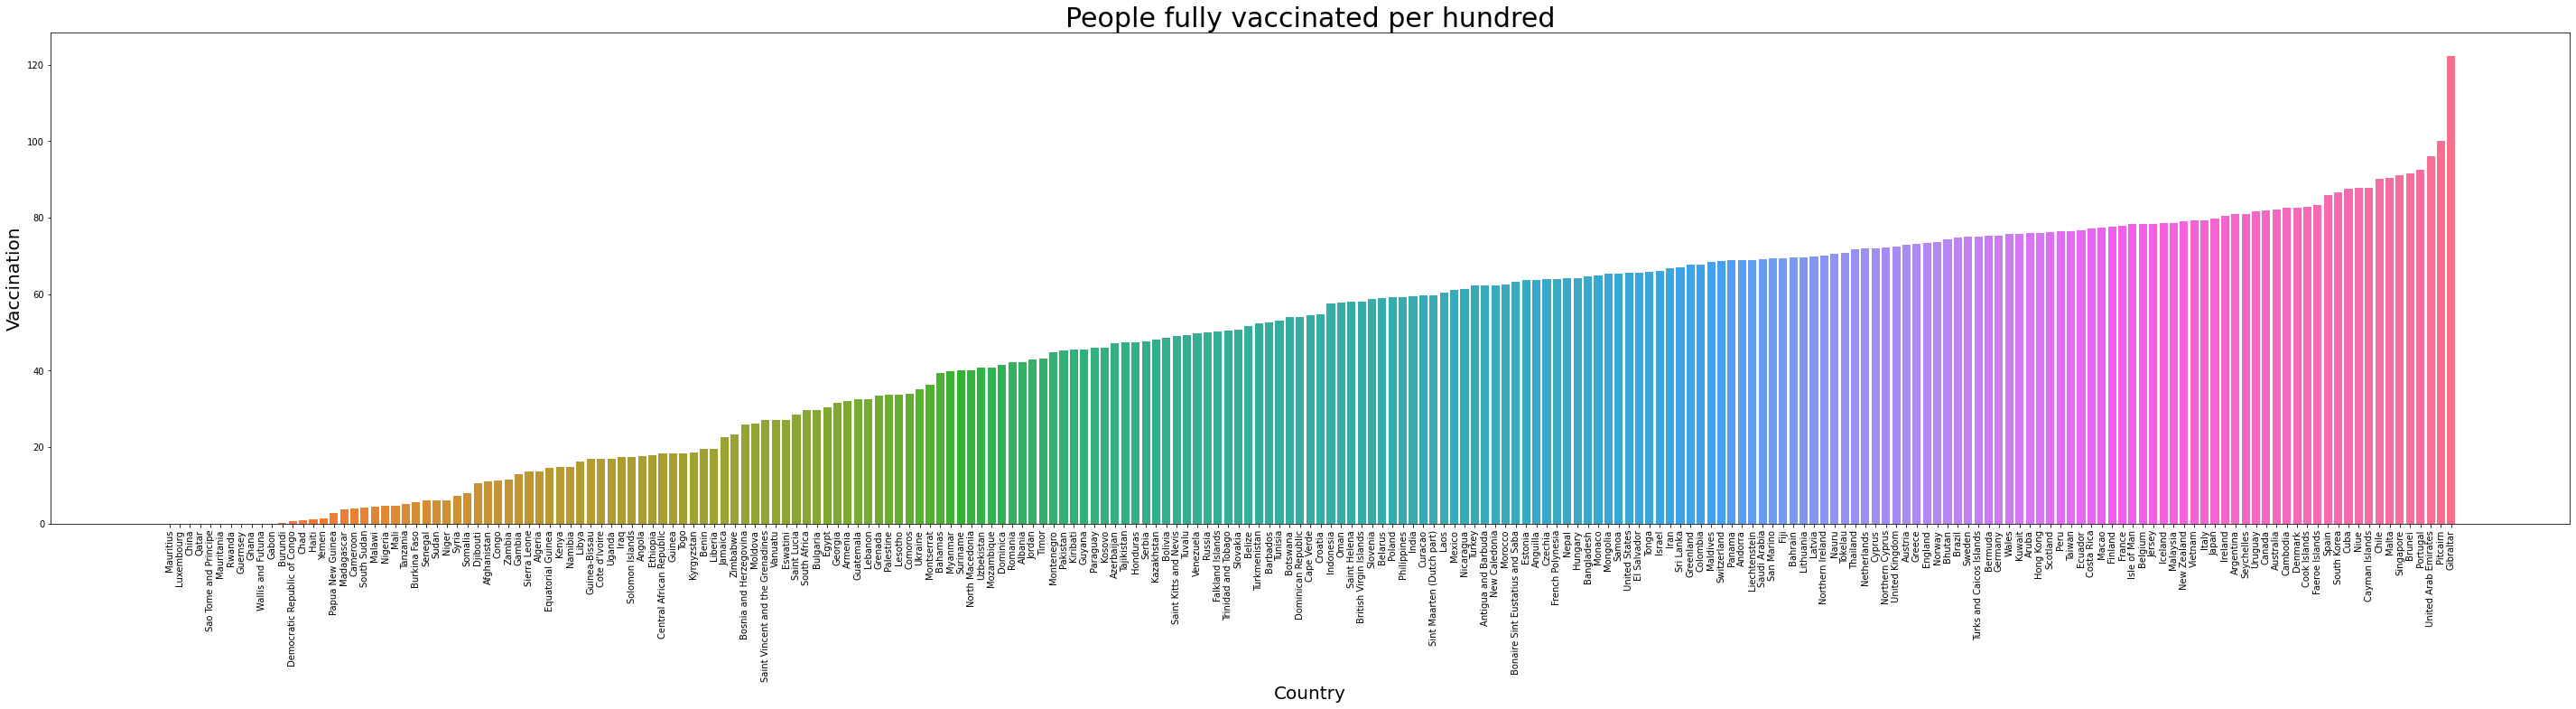

In [108]:
fig1, ax1 = plt.subplots(figsize=(50, 10))
colors = sns.color_palette("husl", len(vaccination))
ax1.bar(vaccination["country"], vaccination["people_fully_vaccinated_per_hundred"], color=colors)

ax1.set_title("People fully vaccinated per hundred", fontsize=30)
ax1.set_xlabel("Country", fontsize=20)
ax1.set_ylabel("Vaccination", fontsize=20)

plt.xticks(rotation=90)
plt.show()

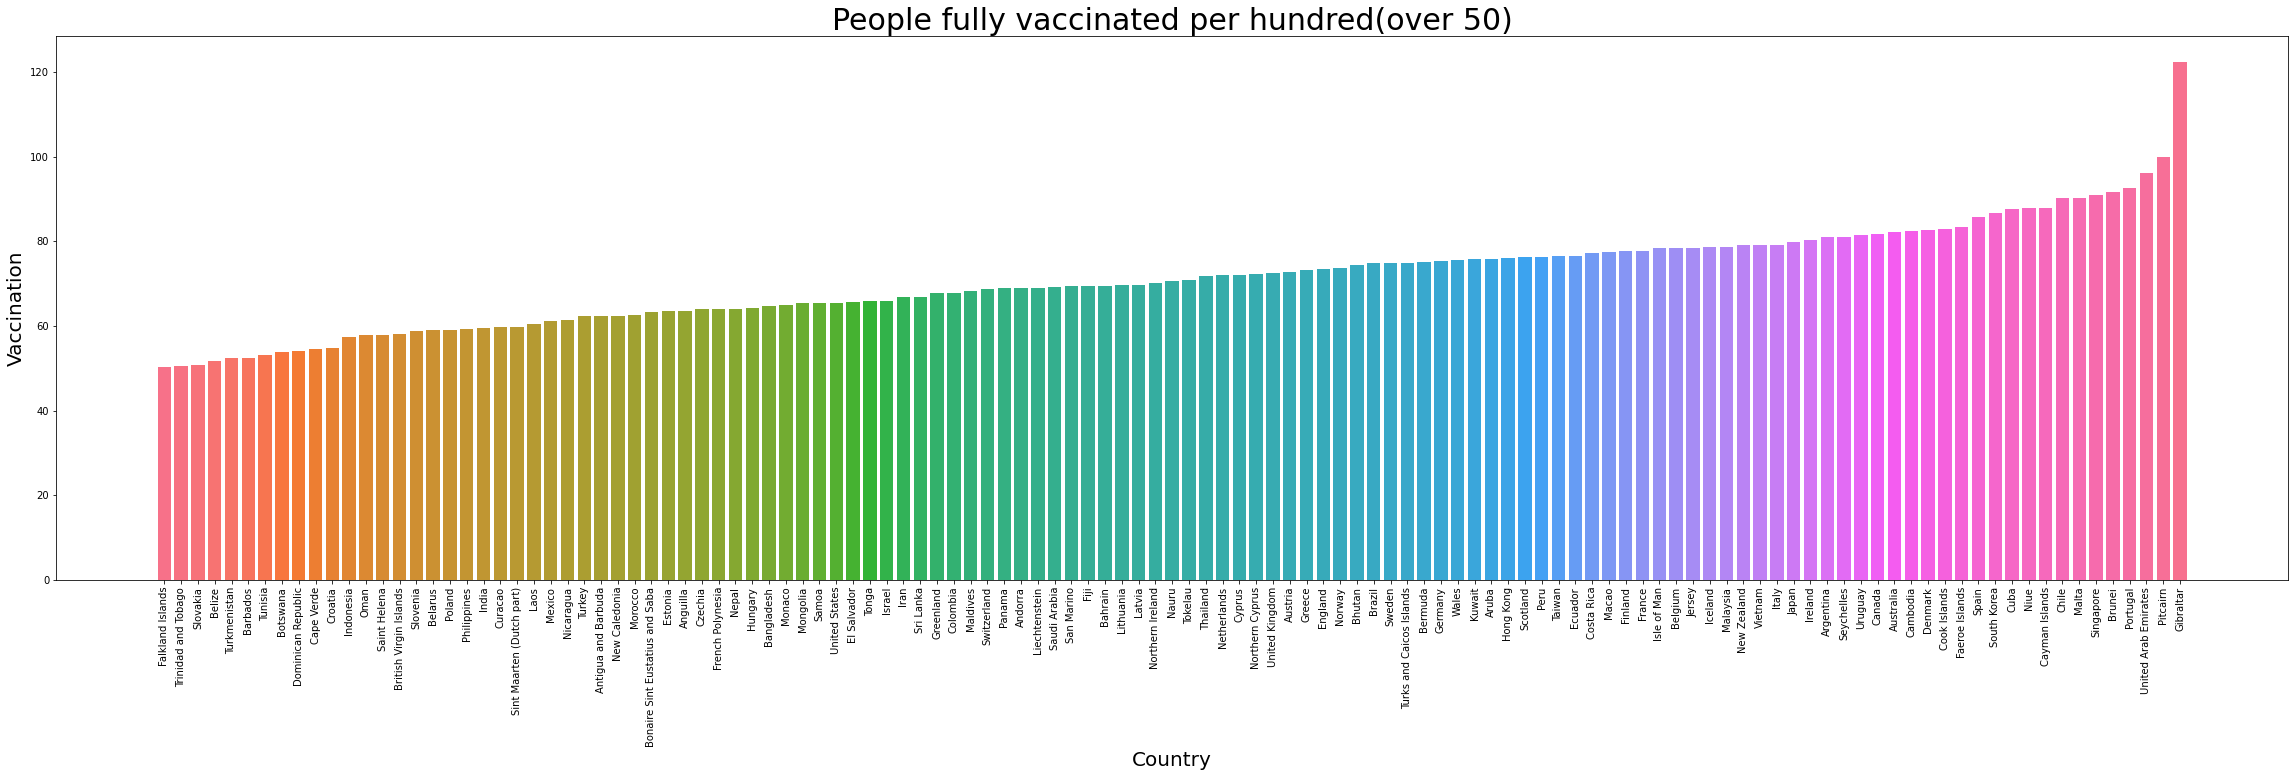

In [109]:
over_50 = vaccination[vaccination["people_fully_vaccinated_per_hundred"] > 50]

fig2, ax2 = plt.subplots(figsize=(40, 10))
colors = sns.color_palette("husl", len(over_50))
ax2.bar(over_50["country"], over_50["people_fully_vaccinated_per_hundred"], color=colors)

ax2.set_title("People fully vaccinated per hundred(over 50)", fontsize=30)
ax2.set_xlabel("Country", fontsize=20)
ax2.set_ylabel("Vaccination", fontsize=20)

plt.xticks(rotation=90)
plt.show()

### 미슐랭 가이드에 등재된 국가의 백신 접종 현황

미슐랭 가이드에 등록된 국가의 백신 접종 현황에 대한 그래프

In [110]:
michelin_country = ['Germany', 'UK', 'Austria', 'China', 'Hong Kong','Spain', 'Japan', 
                   'South Korea', 'Italy', 'USA', 'Sweden', 'Norway', 'Denmark', 'Singapore',
                   'Netherlands', 'Switzerland','France', 'Belgium', 'Ireland', 'Thailand', 'Portugal', 
                   'Greece', 'Slovenia','Luxembourg', 'Brazil', 'Malta', 'Andorra', 'San Marino', 
                   'Czechia','Iceland', 'Finland', 'Croatia', 'Hungary', 'Poland', 'Serbia']

michelin_vaccination = vaccination[vaccination["country"].isin(michelin_country)]
print(michelin_vaccination.info())
michelin_vaccination.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 46420 to 63189
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              33 non-null     object 
 1   iso_code                             33 non-null     object 
 2   date                                 33 non-null     object 
 3   total_vaccinations                   33 non-null     float64
 4   people_vaccinated                    33 non-null     float64
 5   people_fully_vaccinated              33 non-null     float64
 6   daily_vaccinations_raw               33 non-null     float64
 7   daily_vaccinations                   33 non-null     float64
 8   total_vaccinations_per_hundred       33 non-null     float64
 9   people_vaccinated_per_hundred        33 non-null     float64
 10  people_fully_vaccinated_per_hundred  33 non-null     float64
 11  daily_vaccinations_per_mill

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
46420,Luxembourg,LUX,2022-03-26,1.280144e+06,480279.0,0.0,300.0,254.0,201.66,75.66,0.00,400.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Government of Luxembourg,https://data.public.lu/en/datasets/donnees-cov...
16225,China,CHN,2022-03-29,3.263129e+09,0.0,0.0,4087000.0,4075429.0,225.94,0.00,0.00,2822.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",National Health Commission,http://www.nhc.gov.cn/jkj/s7915/202203/d81d339...
68973,Serbia,SRB,2022-03-22,8.494958e+06,3347209.0,3269374.0,1157.0,562.0,123.63,48.71,47.58,82.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Government of Serbia,https://vakcinacija.gov.rs/
18923,Croatia,HRV,2022-03-29,5.224151e+06,2310786.0,2237864.0,0.0,826.0,127.99,56.61,54.83,202.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://www.koronavirus.hr
71458,Slovenia,SVN,2022-03-29,2.977006e+06,1264649.0,1220153.0,383.0,498.0,143.21,60.84,58.70,240.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",National Institute of Public Health via covid-...,https://covid-19.sledilnik.org/sl/stats


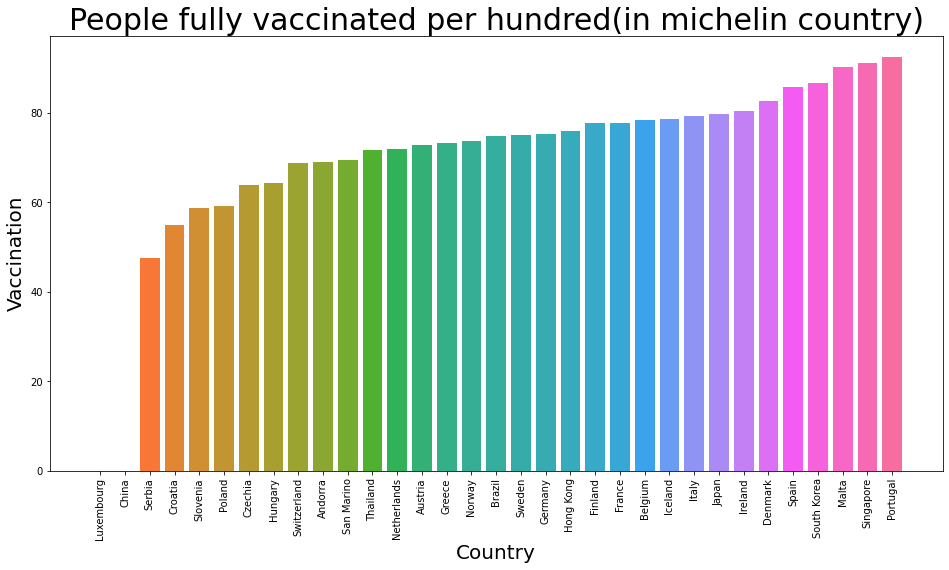

In [111]:
fig3, ax3 = plt.subplots(figsize=(16, 8))
colors = sns.color_palette('husl', len(michelin_vaccination))
ax3.bar(michelin_vaccination["country"], michelin_vaccination["people_fully_vaccinated_per_hundred"], color=colors)

ax3.set_title("People fully vaccinated per hundred(in michelin country)", fontsize=30)
ax3.set_xlabel("Country", fontsize=20)
ax3.set_ylabel("Vaccination", fontsize=20)

plt.xticks(rotation=90)
plt.show()